# Analiza danych w języku Python - ćwiczenia laboratoryjne 2024/2025

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika. Wyjątek stanowi ostatni z projektów, gdzie po konsultacji z prowadzącym zajęcia możliwa jest większa swoboda w doborze pakietów.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie:

---

## Zestaw zadań 3: Ruch rowery na moście Fremont w Seattle (Notatnik 3/3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych
Poniższy kod wczytuje do zmiennych `daily_bike_traffic_data` oraz `weather_data` dane z przygotowanych wcześniej plików daily_bike_traffic_data.pkl i weather_data.pkl.

In [3]:
# Ruch rowerowy
daily_bike_traffic_data = pd.read_pickle("daily_bike_traffic_data.pkl")
daily_bike_traffic_data

,Total,East,West
Date,,,
2022-01-01,33.0,23.0,10.0
2022-01-02,37.0,20.0,17.0
2022-01-03,253.0,93.0,160.0
2022-01-04,577.0,220.0,357.0
2022-01-05,713.0,261.0,452.0
...,...,...,...
2022-12-27,429.0,181.0,248.0
2022-12-28,1108.0,449.0,659.0
2022-12-29,687.0,261.0,426.0


In [4]:
# Pogoda
weather_data = pd.read_pickle("weather_data.pkl")
weather_data

Temperature                      Precipitation Snow        \
                   Min       Avg        Max         Total Fall Depth   
Date                                                                   
2022-01-01   -5.555556 -2.222222   1.111111         0.000  0.0  76.2   
2022-01-02   -1.111111  2.777778   6.111111        20.066  0.0  76.2   
2022-01-03    0.555556  2.777778   5.000000        12.446  0.0   0.0   
2022-01-04    1.666667  3.888889   5.555556         5.588  0.0   0.0   
2022-01-05    1.111111  2.777778   3.888889         8.382  0.0   0.0   
...                ...       ...        ...           ...  ...   ...   
2022-12-27    6.666667  9.444444  11.666667         6.858  0.0   0.0   
2022-12-28    5.000000  6.666667   7.777778         0.762  0.0   0.0   
2022-12-29    5.000000  6.666667   7.777778         8.890  0.0   0.0   
2022-12-30    5.555556  8.888889  11.666667         9.144  0.0   0.0   
2022-12-31    6.111111  7.777778   9.444444         0.254  0.0   0.0   

                Wind                   Sky  
           Avg speed Max speed Cloud cover  
Date                                        
2022-01-01  3.576320   5.36448         0.8  
2022-01-02  3.799840   8.94080         1.0  
2022-01-03  5.140960  11.62304         0.9  
2022-01-04  4.336288   9.83488         0.9  
2022-01-05  2.235200   4.47040         1.0  
...              ...       ...         ...  
2022-12-27  7.733792  16.54048         1.0  
2022-12-28  5.766816  12.51712         0.8  
2022-12-29  2.771648   7.59968         1.0  
2022-12-30  6.437376  11.62304         0.9  
2022-12-31  4.470400   9.38784         0.9  

[365 rows x 9 columns]

### Zadnie 4: Analiza korelacji [10 pkt]

#### a) Korelacje liniowe pomiędzy parametrami pogody a liczbą rowerzystów

Przygotuj tablicę zawierającą wartości współczynników korelacji liniowej Pearsona `R_corr_1` oraz tablicę wyliczonych na ich podstawie współczynników determinacji liniowej `R2_corr_1` pomiędzy wartościami parametrów pogody, a liczbą rowerzystów przejeżdżających przez most danego dnia.

Tablice powinna zawierać wyłącznie następujące elementy:</br>
> Indeks: zestaw indeksów identycznych z nazwami kolumn tablicy `weather_data` </br>

> Kolumny: zestaw indeksów identycznych z nazwami kolumn tablicy `daily_bike_traffic_data`</br>
    
Wyświetl przygotowane tablice w taki sposób aby zawarte w nich wartości wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw dane zawarte w tablicach w postaci wykresów heatmap. Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x2). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różną od domyślnej skalę kolorów wykresów,
- do każdego z wykresów dołącz pasek kolorów,
- skale kolorów oraz paski kolorów powinny mieć zakresy wartości docięte do teoretycznego zakresu wartości jakie może osiągać wizualizowany na wykresie parametr,
- ustaw parametry wykresu tak, aby wartości współczynników wyświetlały się z dokładnością 3 miejsc po przecinku.

In [5]:
# Tabela R
R_corr_1 = pd.DataFrame(index=weather_data.columns, columns=daily_bike_traffic_data.columns)

for w_col in weather_data.columns:
    for b_col in daily_bike_traffic_data.columns:
        r = weather_data[w_col].corr(daily_bike_traffic_data[b_col])
        R_corr_1.loc[w_col, b_col] = r  

R_corr_1 = R_corr_1.astype(float)

display(R_corr_1.round(3))

Total   East   West
Temperature   Min          0.702  0.714  0.679
              Avg          0.771  0.790  0.742
              Max          0.789  0.812  0.758
Precipitation Total       -0.452 -0.465 -0.434
Snow          Fall        -0.148 -0.151 -0.142
              Depth       -0.237 -0.238 -0.231
Wind          Avg speed   -0.238 -0.245 -0.228
              Max speed   -0.346 -0.344 -0.339
Sky           Cloud cover -0.570 -0.584 -0.549

In [6]:
# Tabela R^2
R2_corr_1 = R_corr_1 ** 2
display(R2_corr_1.round(3))

Total   East   West
Temperature   Min          0.492  0.510  0.461
              Avg          0.594  0.625  0.551
              Max          0.622  0.660  0.574
Precipitation Total        0.204  0.216  0.188
Snow          Fall         0.022  0.023  0.020
              Depth        0.056  0.057  0.053
Wind          Avg speed    0.056  0.060  0.052
              Max speed    0.120  0.119  0.115
Sky           Cloud cover  0.325  0.341  0.301

In [7]:
### Komórka testowa

# Testy wybranych wartości z tablicy R
assert np.isclose(R_corr_1.loc[("Temperature", "Min"), "Total"], 0.7016549936827619)
assert np.isclose(R_corr_1.loc[('Snow', 'Fall'), "East"], -0.1513545851889312)
assert np.isclose(R_corr_1.loc[('Wind', 'Max speed'), "West"], -0.3394814202230162)

# Testy wybranych wartości z tablicy R^2
assert np.isclose(R2_corr_1.loc[("Temperature", "Avg"), "Total"], 0.5941735252448272)
assert np.isclose(R2_corr_1.loc[("Precipitation", "Total"), "East"], 0.21602605629121266)
assert np.isclose(R2_corr_1.loc[("Sky", "Cloud cover"), "West"], 0.3012666920823503)

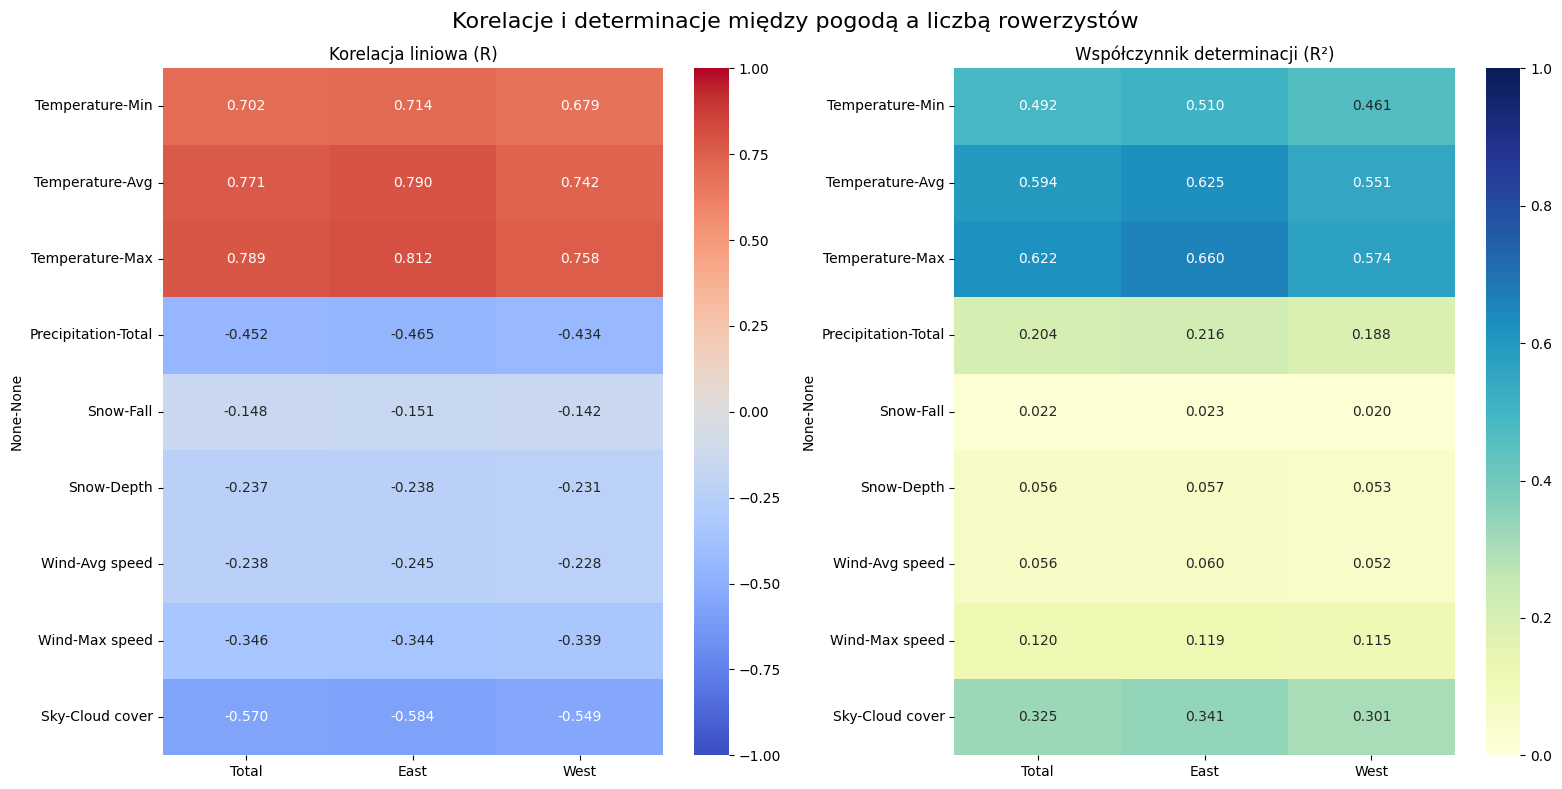

In [8]:
# Wykresy
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
plt.suptitle("Korelacje i determinacje między pogodą a liczbą rowerzystów", fontsize=16)

# Heatmap 1 – R (Pearson)
sns.heatmap(
    R_corr_1.round(3),
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    cbar=True,
    ax=axes[0]
)
axes[0].set_title("Korelacja liniowa (R)")

# Heatmap 2 – R² (determinacja)
sns.heatmap(
    R2_corr_1.round(3),
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    vmin=0, vmax=1,
    cbar=True,
    ax=axes[1]
)
axes[1].set_title("Współczynnik determinacji (R²)")

plt.tight_layout()
plt.show()

#### b) Korelacje liniowe między parametrami pogody

Przygotuj tablicę zawierającą wartości współczynników korelacji liniowej Pearsona `R_corr_2` oraz tablicę wyliczonych na ich podstawie współczynników determinacji liniowej `R2_corr_2` pomiędzy wartościami parametrów pogody.

- Tablice powinna zawierać wyłącznie następujące elementy:</br>
    > Indeks: Zestaw indeksów identycznych z nazwami kolumn tablicy `weather_data`</br>
    
    > Kolumny: Zestaw indeksów identycznych z nazwami kolumn tablicy `weather_data`</br>
    
Wyświetl przygotowane tablice w taki sposób aby zawarte w nich wartości wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw dane zawarte w tablicach w postaci wykresów heatmap. Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x2). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różną od domyślnej skalę kolorów wykresów,
- do każdego z wykresów dołącz pasek kolorów,
- skale kolorów oraz paski kolorów powinny mieć zakresy wartości docięte do teoretycznego zakresu wartości jakie może osiągać wizualizowany na wykresie parametr,
- ustaw parametry wykresu tak, aby wartości współczynników wyświetlały się z dokładnością 3 miejsc po przecinku.

In [9]:
# Tablica R
R_corr_2 = weather_data.corr()
display(R_corr_2.round(3))

Temperature               Precipitation   Snow  \
                                  Min    Avg    Max         Total   Fall   
Temperature   Min               1.000  0.968  0.912        -0.155 -0.157   
              Avg               0.968  1.000  0.985        -0.215 -0.153   
              Max               0.912  0.985  1.000        -0.248 -0.145   
Precipitation Total            -0.155 -0.215 -0.248         1.000  0.114   
Snow          Fall             -0.157 -0.153 -0.145         0.114  1.000   
              Depth            -0.233 -0.216 -0.195         0.101  0.413   
Wind          Avg speed        -0.104 -0.129 -0.143         0.235  0.088   
              Max speed        -0.201 -0.216 -0.220         0.271  0.080   
Sky           Cloud cover      -0.355 -0.528 -0.625         0.354  0.018   

                                      Wind                   Sky  
                           Depth Avg speed Max speed Cloud cover  
Temperature   Min         -0.233    -0.104    -0.201      -0.355  
              Avg         -0.216    -0.129    -0.216      -0.528  
              Max         -0.195    -0.143    -0.220      -0.625  
Precipitation Total        0.101     0.235     0.271       0.354  
Snow          Fall         0.413     0.088     0.080       0.018  
              Depth        1.000     0.085     0.069       0.057  
Wind          Avg speed    0.085     1.000     0.872       0.111  
              Max speed    0.069     0.872     1.000       0.197  
Sky           Cloud cover  0.057     0.111     0.197       1.000

In [10]:
# Tablica R^2
R2_corr_2 = (R_corr_2 ** 2)
display(R2_corr_2.round(3))

Temperature               Precipitation   Snow  \
                                  Min    Avg    Max         Total   Fall   
Temperature   Min               1.000  0.937  0.832         0.024  0.025   
              Avg               0.937  1.000  0.971         0.046  0.024   
              Max               0.832  0.971  1.000         0.062  0.021   
Precipitation Total             0.024  0.046  0.062         1.000  0.013   
Snow          Fall              0.025  0.024  0.021         0.013  1.000   
              Depth             0.054  0.047  0.038         0.010  0.171   
Wind          Avg speed         0.011  0.017  0.020         0.055  0.008   
              Max speed         0.041  0.047  0.049         0.074  0.006   
Sky           Cloud cover       0.126  0.279  0.390         0.125  0.000   

                                      Wind                   Sky  
                           Depth Avg speed Max speed Cloud cover  
Temperature   Min          0.054     0.011     0.041       0.126  
              Avg          0.047     0.017     0.047       0.279  
              Max          0.038     0.020     0.049       0.390  
Precipitation Total        0.010     0.055     0.074       0.125  
Snow          Fall         0.171     0.008     0.006       0.000  
              Depth        1.000     0.007     0.005       0.003  
Wind          Avg speed    0.007     1.000     0.760       0.012  
              Max speed    0.005     0.760     1.000       0.039  
Sky           Cloud cover  0.003     0.012     0.039       1.000

In [11]:
### Komórka testowa

# Testy wybranych wartości z tablicy R
assert np.isclose(R_corr_2.loc[("Temperature", "Avg"), ('Snow', 'Fall')], -0.15332754676249075)
assert np.isclose(R_corr_2.loc[("Precipitation", "Total"), ("Wind", "Max speed")], 0.27117268223209673)
assert np.isclose(R_corr_2.loc[("Sky", "Cloud cover"), ("Temperature", "Max")], -0.6248338895216168)

# Testy wybranych wartości z tablicy R^2
assert np.isclose(R2_corr_2.loc[("Snow", "Depth"), ("Wind", "Max speed")], 0.004732081693920376)
assert np.isclose(R2_corr_2.loc[("Temperature", "Min"), ("Temperature", "Avg")], 0.9373738975008452)
assert np.isclose(R2_corr_2.loc[("Precipitation", "Total"), ("Sky", "Cloud cover")], 0.12532191894477251)

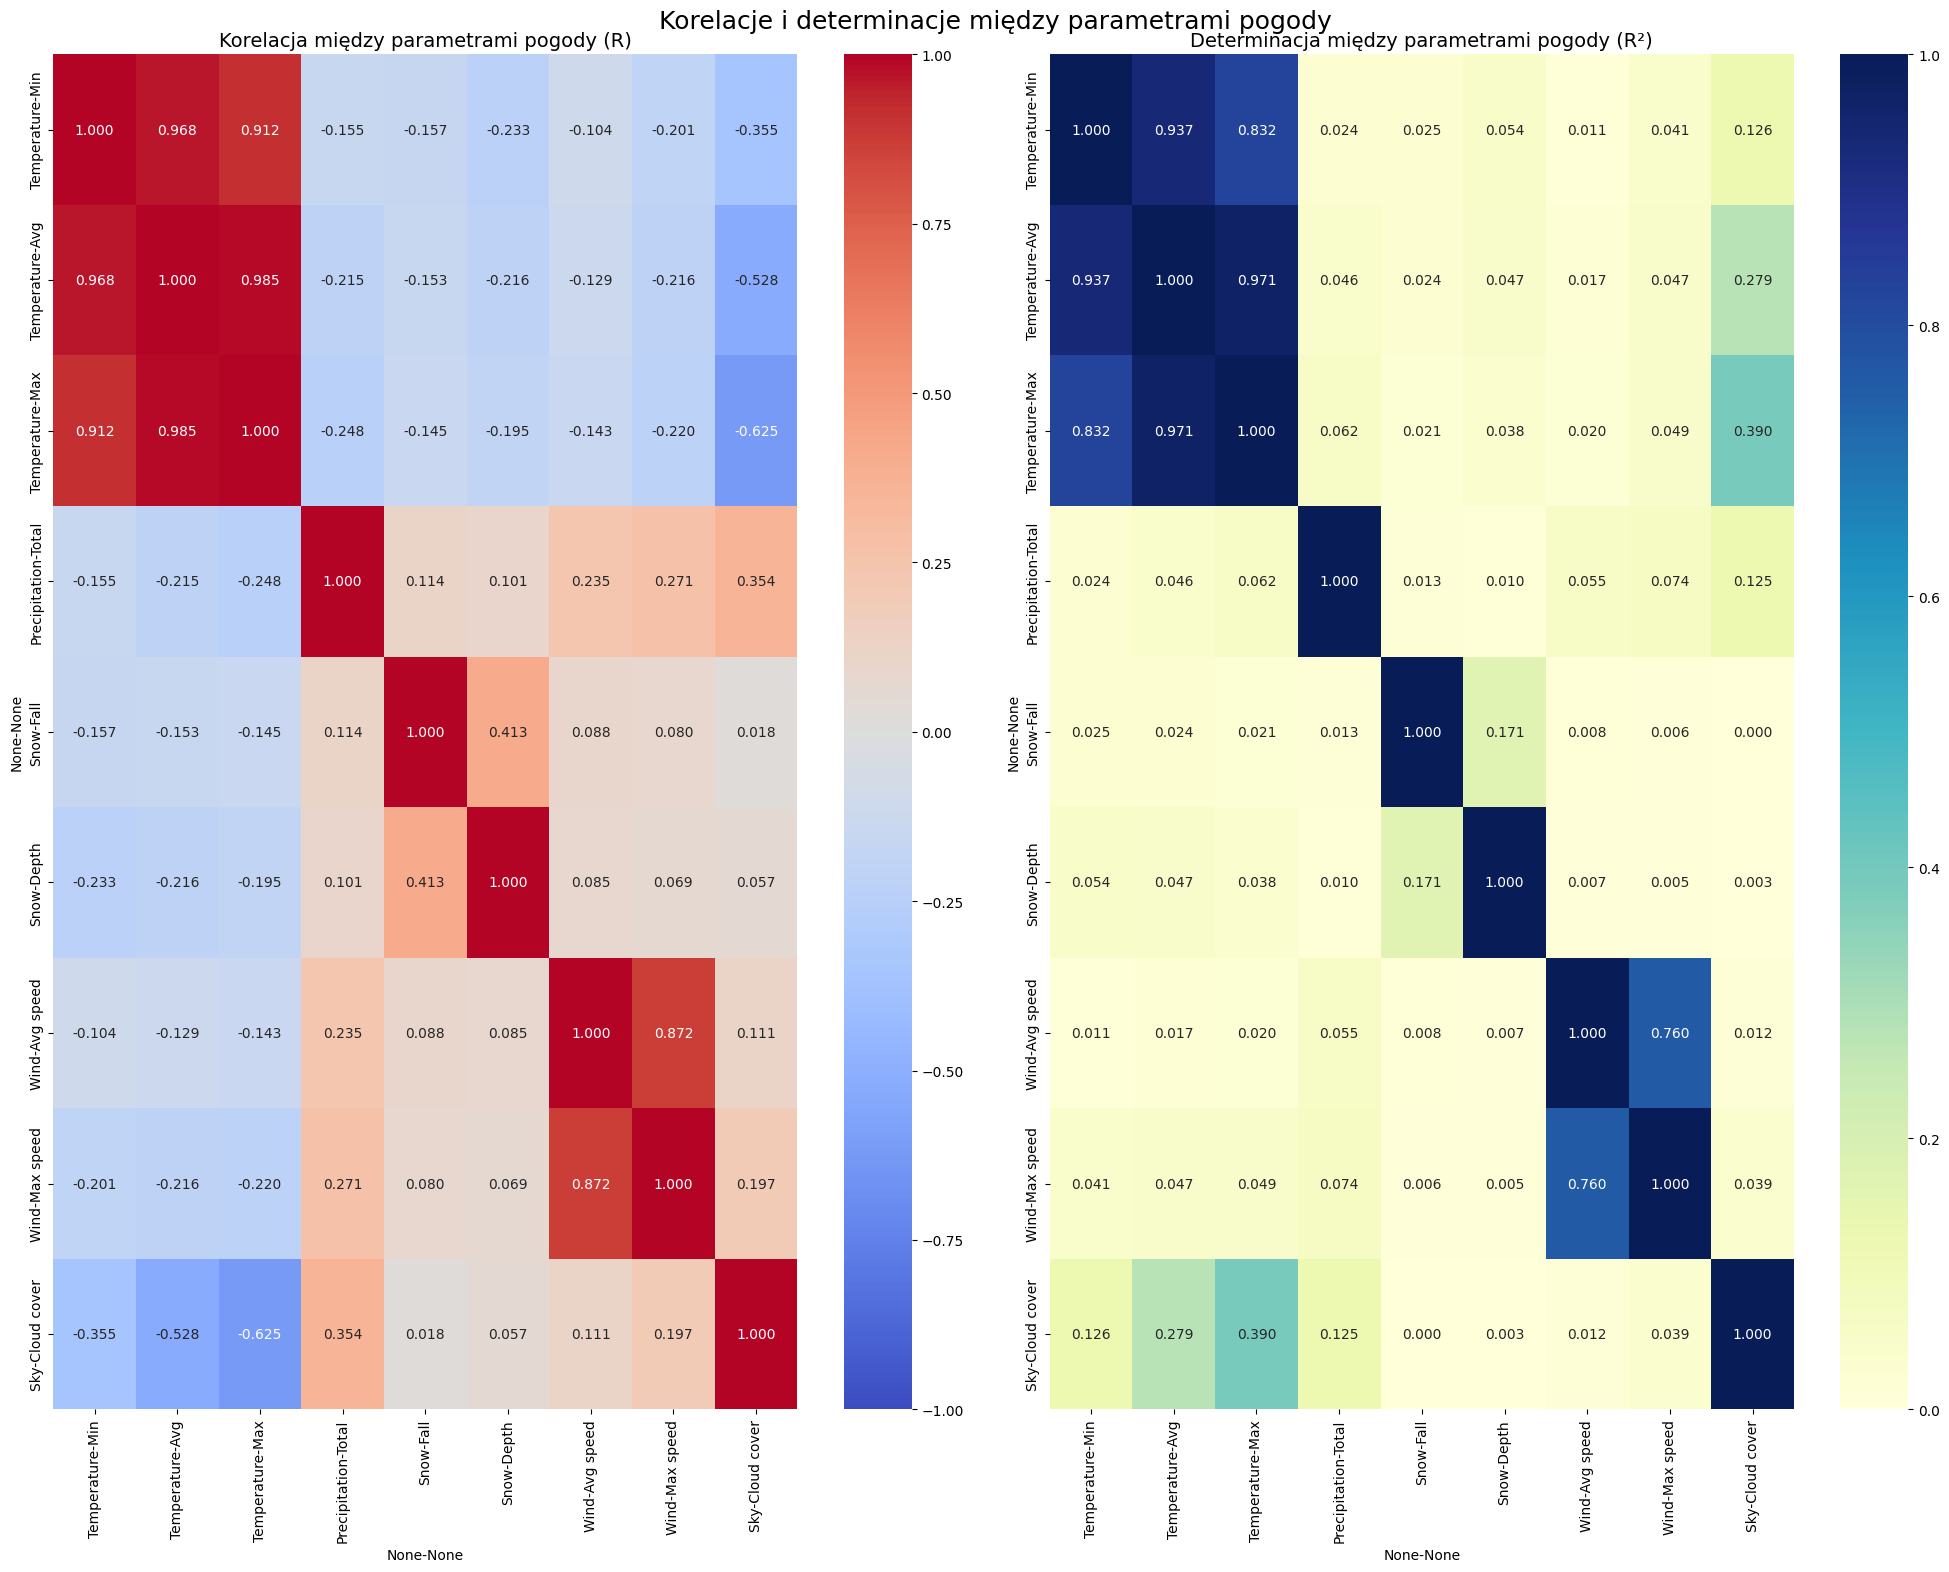

In [12]:
# Wykresy
fig, axes = plt.subplots(1, 2, figsize=(20, 16))
plt.suptitle("Korelacje i determinacje między parametrami pogody", fontsize=18)

# Heatmap 1 – R (Pearson)
sns.heatmap(
    R_corr_2.round(3),
    annot=True,
    fmt=".3f",
    cmap="coolwarm",     
    vmin=-1, vmax=1,
    cbar=True,
    ax=axes[0]
)
axes[0].set_title("Korelacja między parametrami pogody (R)", fontsize=14)

# Heatmap 2 – R² (determinacja)
sns.heatmap(
    R2_corr_2.round(3),
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",        
    vmin=0, vmax=1,
    cbar=True,
    ax=axes[1]
)
axes[1].set_title("Determinacja między parametrami pogody (R²)", fontsize=14)

# Układ
plt.tight_layout()
plt.show()

### Zadnie 5: Analiza regresji [25 pkt]

#### a) Regresja liniowa

Korzystając z funkcji `scipy.stats.linregress()` przygotuj tablicę `regression_data_1` zawierającą wartości współczynników równania regresji liniowej pomiędzy wartościami parametrów pogody (zmienna niezależna, objaśniająca), a liczbą rowerzystów przejeżdżających przez most danego dnia (zmienna zależna, objaśniana).

- Tablica powinna zawierać wyłącznie następujące elementy:</br>
    > Indeks: Zestaw indeksów identycznych z nazwami kolumn tablicy weather_data</br>
    
    > Kolumny:</br>
    > 1 rzędu: Total, East, West</br>
    > 2 rzędu: a, b (ten sam zestaw kolumn dla każdego indeksu 1 rzędu)</br>
    
Wyświetl przygotowaną tablicę w taki sposób aby zawarte w tablicy wartości wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw wyniki analizy w postaci wykresów korelacyjnych poszczególnych parametrów pogody z całkowitą liczbą rowerzystów przejeżdżających przes most danego dnia z nałożonymi na nie prostymi regresji. Zestaw wykresy na pojedynczej figurze (siatka wykresów 3x3). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory widocznych na wykresach punktów i linii,
- w tytule lub legendzie każdego z wykresów załącz równania regresji sformatowane tak, aby parametry równania były wyświetlone z dokładnością 3 miejsc po przecinku,
- w przypadku zastosowania legend należy je umiejscowić tak, aby znajdowały się w obrębie pól wykresów, ale nie zasłaniały znajdujących się na nich danych.

In [13]:
# Tabela
from scipy.stats import linregress
dependent_vars = ['Total', 'East',
                  'West']
independent_vars = weather_data.columns

columns = pd.MultiIndex.from_product([dependent_vars, ['a', 'b']])
index = weather_data.columns
regression_data_1 = pd.DataFrame(index=index, columns=columns)

for indep_var in independent_vars:
    for dep_var in dependent_vars:
        x = weather_data[indep_var]
        y = daily_bike_traffic_data[dep_var]
        valid = x.notna() & y.notna()
        slope, intercept, *_ = linregress(x[valid], y[valid])
        regression_data_1.loc[indep_var, (dep_var, 'a')] = slope
        regression_data_1.loc[indep_var, (dep_var, 'b')] = intercept

regression_data_1 = regression_data_1.astype(float).round(3)
regression_data_1

Total               East                West  \
                                  a         b        a         b         a   
Temperature   Min           130.092  1233.183   52.545   495.833    77.546   
              Avg           118.375   801.228   48.119   317.420    70.255   
              Max            99.799   611.670   40.730   237.665    59.069   
Precipitation Total         -62.872  2372.922  -25.667   956.796   -37.204   
Snow          Fall          -39.438  2200.951  -16.064   886.648   -23.374   
              Depth         -35.935  2219.811  -14.352   894.010   -21.583   
Wind          Avg speed    -182.403  2796.774  -74.723  1130.769  -107.681   
              Max speed    -155.141  3286.343  -61.346  1315.648   -93.795   
Sky           Cloud cover -2017.975  3548.963 -820.761  1434.909 -1197.214   

                                     
                                  b  
Temperature   Min           737.350  
              Avg           483.809  
              Max           374.005  
Precipitation Total        1416.126  
Snow          Fall         1314.303  
              Depth        1325.801  
Wind          Avg speed    1666.005  
              Max speed    1970.696  
Sky           Cloud cover  2114.054

In [14]:
### Komórka testowa

# Testy wybranych wartości z tablicy regression_data_1
assert np.isclose(regression_data_1.loc[("Temperature", "Avg"), ('Total', 'a')], 118.37455627981312)
assert np.isclose(regression_data_1.loc[("Snow", "Depth"), ('Total', 'b')], 2219.810729613734)
assert np.isclose(regression_data_1.loc[("Wind", "Avg speed"), ('East', 'a')], -74.72308463717329)
assert np.isclose(regression_data_1.loc[("Precipitation", "Total"), ('East', 'b')], 956.7960528263079)
assert np.isclose(regression_data_1.loc[("Temperature", "Min"), ('West', 'a')], 77.54619929276554)
assert np.isclose(regression_data_1.loc[("Wind", "Max speed"), ('West', 'b')], 1970.6955983993344)

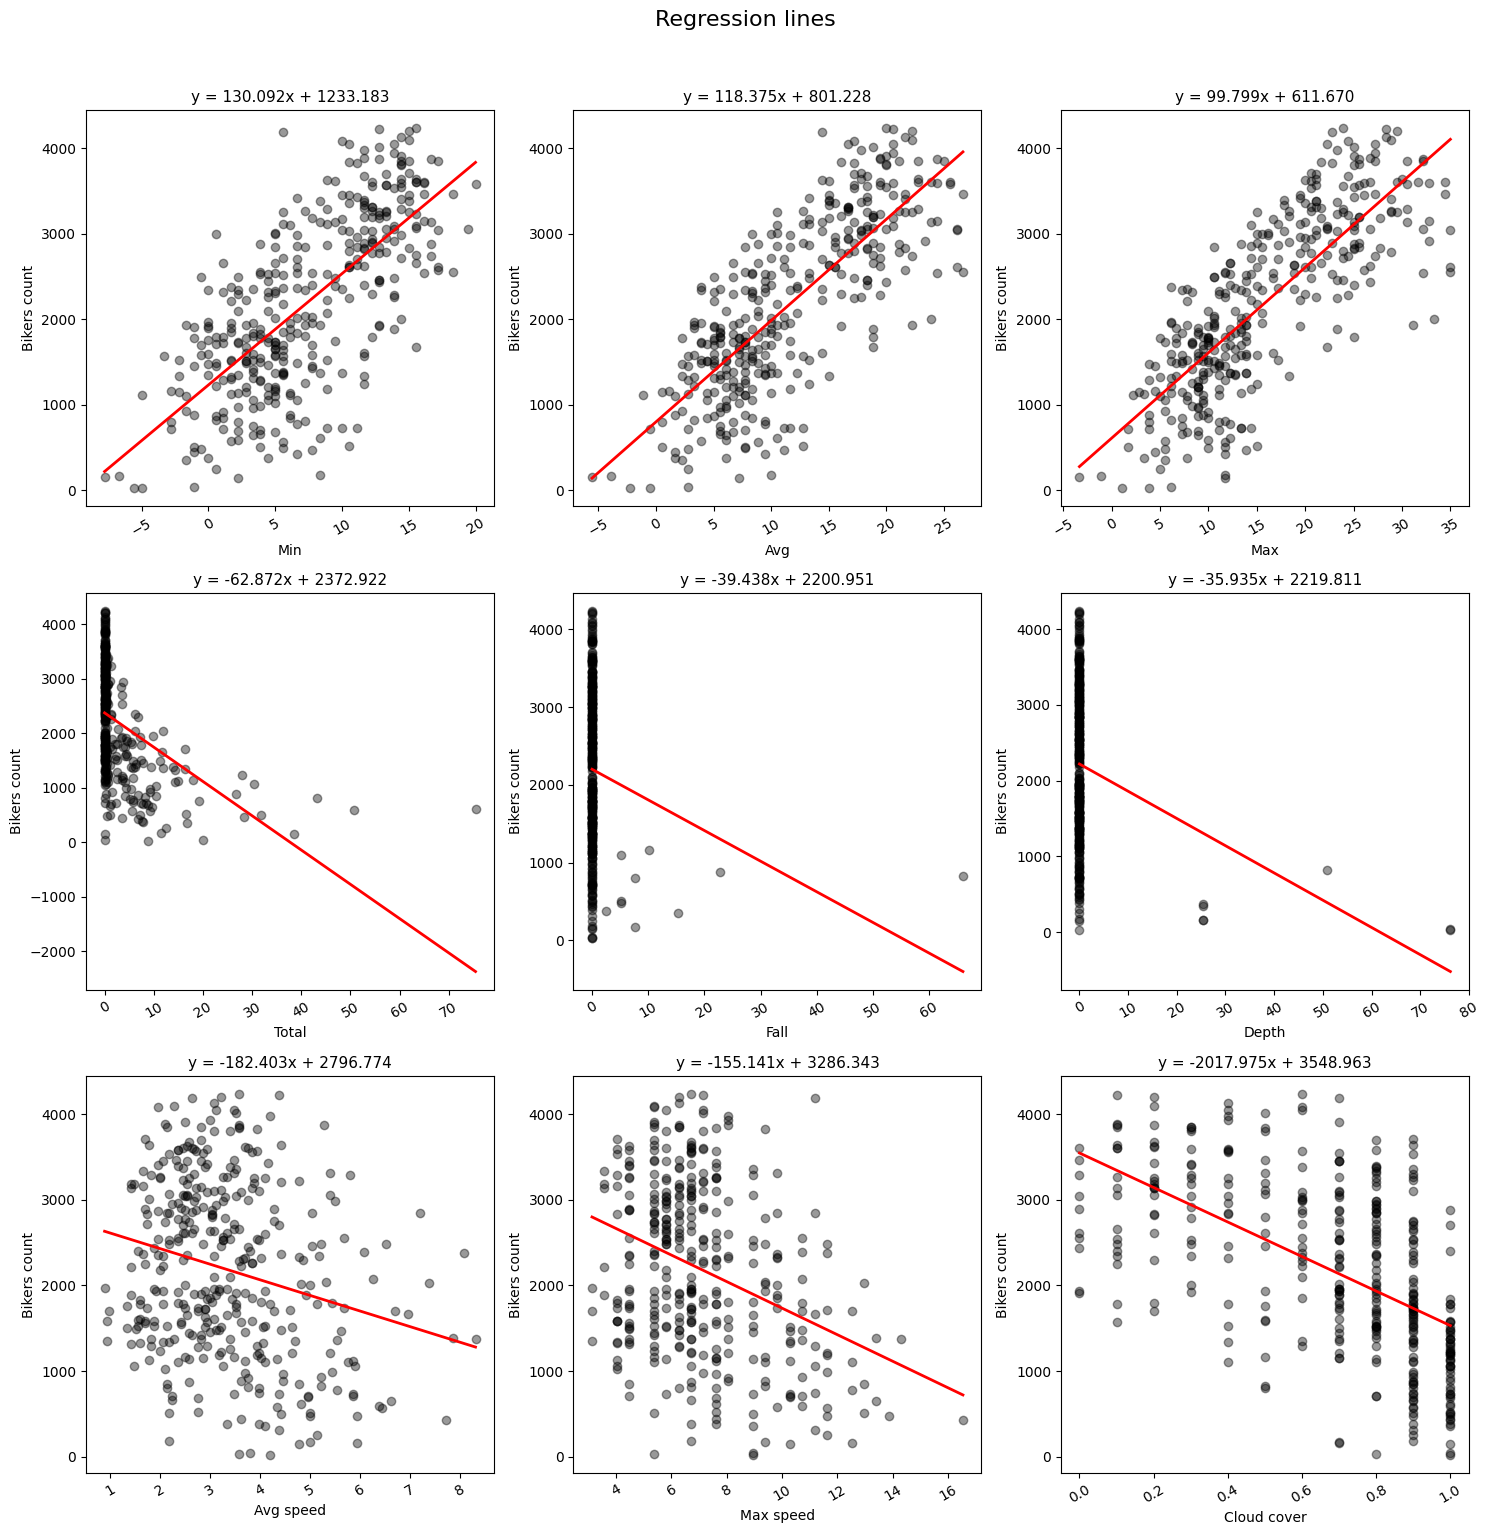

In [29]:
# Wykresy regresji liniowej z równaniami w tytułach
y = daily_bike_traffic_data['Total']

# Przygotuj siatkę wykresów 3x3
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Generowanie wykresów
for i, indep_var in enumerate(independent_vars):
    x = weather_data[indep_var]
    valid = x.notna() & y.notna()
    x_valid = x[valid]
    y_valid = y[valid]

    # Współczynniki regresji z tabeli
    a = regression_data_1.loc[indep_var, ('Total', 'a')]
    b = regression_data_1.loc[indep_var, ('Total', 'b')]

    x_line = np.linspace(x_valid.min(), x_valid.max(), 100)
    y_line = a * x_line + b

    ax = axes[i]
    ax.scatter(x_valid, y_valid, color='black', alpha=0.4, label="Dane")
    ax.plot(x_line, y_line, color='red', linewidth=2)

    # Ustawienie tytułu z nazwą kategorii i równaniem
    title = f"y = {a:.3f}x + {b:.3f}"
    ax.set_title(title, fontsize=11)

    # Opisy osi
    ax.set_ylabel("Bikers count")
    ax.set_xlabel(indep_var[1])
    ax.tick_params(axis='x', labelrotation=30)

# Tytuł figury
fig.suptitle("Regression lines", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


#### b) Regresja krzywoliniowa

Pobieżna analiza wykresów przygotowanych we wcześniejszym podpunkcie pokazuje, że w kilku przypadkach relacje między zmiennymi są bardziej skomplikowane i prosta regresja liniowa nie jest dobrym przybliżeniem obserwowanego trendu.

Korzystając z funkcji `scipy.optimize.curve_fit()` przygotuj tablicę `regression_data_2` zawierającą współczynniki równań regresji między zachmurzeniem, a liczbą rowerzystów przejeżdżających przez most danego dnia oraz między dziennymi opadami, a liczbą rowerzystów przejeżdżających przez most danego dnia. W obu przypadkach skorzystaj z następującego równania regresji:
$$ y = a e^{-bx} + c$$ 
gdzie: a, b, c - współczynniki równania dobierane metodą najmniejszych kwadratów.

W przypadku regresji między dziennymi opadami, a liczbą rowerzystów przejeżdżających przez most danego dnia ustaw parametry funkcji w taki sposób, aby wartość współczynnika c zawierała się w przedziale 90% - 110% wartości średniej liczby rowerzystów z 10 dni w roku z największą ilością opadów.

- Tablice powinna zawierać wyłącznie następujące elementy:</br>
    > Indeks: </br>
    > 1 rzędu: Sky, Precipitation</br>
    > 2 rzędu: Cloud cover, Total (sparowane pojedynczo z odpowiadającymi im indeksami 1 rzędu tak jak w nazwach kolumn tablicy `weather_data`)</br>    
    
    > Kolumny:</br>
    > 1 rzędu: Total, East, West</br>
    > 2 rzędu: a, b, c (ten sam zestaw kolumn dla każdego indeksu 1 rzędu)</br>
    
Wyświetl przygotowaną tablicę w taki sposób aby zawarte w tablicy liczby wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw wyniki analizy w postaci wykresów korelacyjnych poszczególnych parametrów pogody z całkowitą liczbą rowerzystów przejeżdżających przes most danego dnia z nałożonymi na nie krzywymi regresji. Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x2). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory widocznych na wykresach punktów i linii,
- w tytule lub legendzie każdego z wykresów załącz równania regresji sformatowane tak, aby parametry równania były wyświetlone z dokładnością 3 miejsc po przecinku,
- w przypadku zastosowania legend należy je umiejscowić tak, aby znajdowały się w obrębie pól wykresów, ale nie zasłaniały znajdujących się na nich danych.

In [19]:
# Obliczenia i tablica
from scipy.optimize import curve_fit

#rownanie regresji
def model(x, a, b, c):
    return a * np.exp(-b * x) + c

#polaczenie tablic
data = pd.concat([weather_data, daily_bike_traffic_data], axis=1, join='inner')

#indeksy i kolumny
ind = pd.MultiIndex.from_tuples([
    ('Sky', 'Cloud cover'),
    ('Precipitation', 'Total')
])
col = pd.MultiIndex.from_product(
    [['Total', 'East', 'West'], ['a', 'b', 'c']])

#na razie pusta tablica
regression_data_2 = pd.DataFrame(index=ind, columns=col, dtype=float)


#zmienna niezalezna - zachmurzenie
x = data[('Sky', 'Cloud cover')].values
#zmienna zalezna - liczba rowerzystow
for side in ['Total', 'East', 'West']:
    y = data[side].values
    wspl, _ = curve_fit(model, x, y, nan_policy='omit', maxfev=20000) #dla kazdego kierunku ruchu dopasowujemy krzywą modelu (curve_fit tworzy wspl. a,b,c)
    #wspolczynniki dodajemy do tablicy
    for i, p in zip(['a', 'b', 'c'], wspl): #laczy parametry z wartosciami
        regression_data_2.loc[('Sky', 'Cloud cover'), (side, i)] = p #p - wartosc wspl, wpisywany do tabeli

#opady vs ruch
x2 = data[('Precipitation', 'Total')].values
day10 = data.sort_values(('Precipitation', 'Total'), ascending=False).head(10) #sortujemy i bierzemy 10 wartosci - czyli tych z najwiekszymi opadami
range_c = (0.9 * day10['Total'].mean(), 1.1 * day10['Total'].mean()) #zakres dla wspl c

#liczenie wspl
for side in ['Total', 'East', 'West']:
    y2 = data[side].values
    wspl2, _ = curve_fit(model, x2, y2,
        bounds=([-np.inf, -np.inf, range_c[0]], [np.inf, np.inf, range_c[1]]), nan_policy='omit', maxfev=20000) #zakres dla c
    #zapisanie do tabeli
    for i, p in zip(['a', 'b', 'c'], wspl2):
        regression_data_2.loc[('Precipitation', 'Total'), (side, i)] = p


pd.options.display.float_format = '{:.3f}'.format
display(regression_data_2)

Total                    East                  \
                                 a      b        c       a      b        c   
Sky           Cloud cover  -57.238 -3.552 3112.824 -22.234 -3.597 1254.852   
Precipitation Total       1897.345  0.227  697.290 499.543  1.183  570.510   

                             West                  
                                a      b        c  
Sky           Cloud cover -35.041 -3.521 1858.021  
Precipitation Total       977.412  0.343  578.631

In [20]:
### Komórka testowa

# Testy wybranych wartości z tablicy regression_data_2
assert np.isclose(regression_data_2.loc[("Precipitation", "Total"), ('Total', 'a')], 1897.3445607675376)
assert np.isclose(regression_data_2.loc[(("Sky", "Cloud cover")), ('East', 'b')], -3.5974646434134456)
assert np.isclose(regression_data_2.loc[("Precipitation", "Total"), ('Total', 'c')], 697.29)

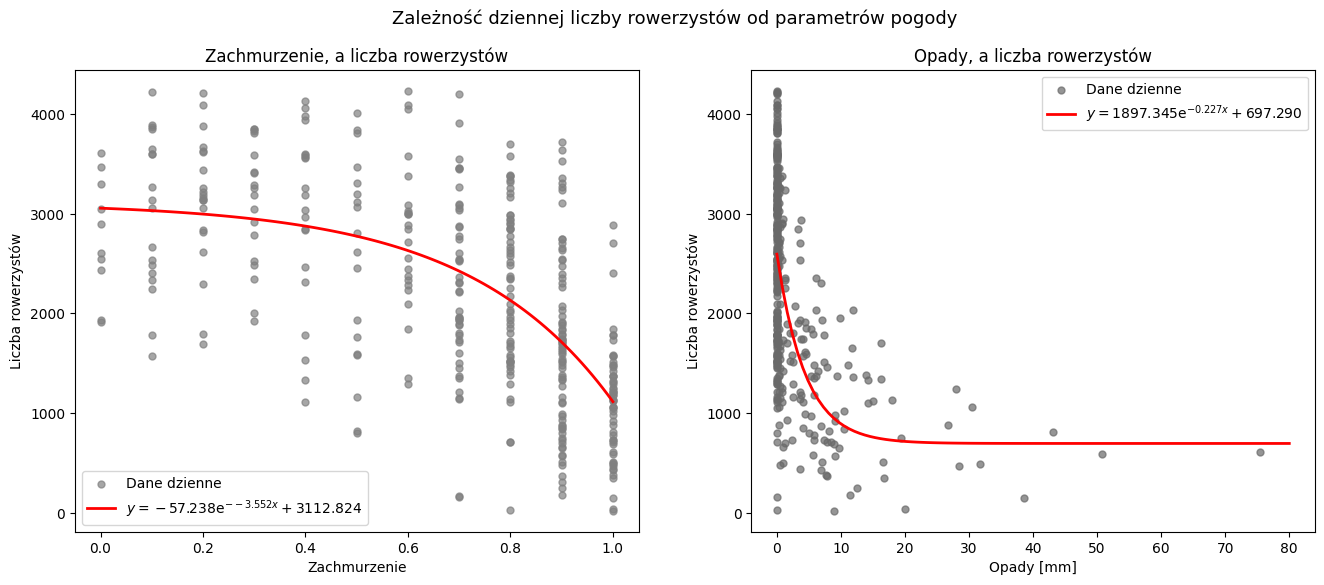

In [27]:
#parametry
x_cloud = data[('Sky', 'Cloud cover')].to_numpy()
x_rain  = data[('Precipitation', 'Total')].to_numpy()
y_total = data['Total'].to_numpy()

a_c, b_c, c_c = regression_data_2.loc[('Sky', 'Cloud cover'),('Total', slice(None))].values
a_r, b_r, c_r = regression_data_2.loc[('Precipitation','Total'),('Total', slice(None))].values

plt.rcParams.update({'figure.facecolor': 'white','axes.facecolor':'white'})

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16, 6),sharey=False)
fig.suptitle("Zależność dziennej liczby rowerzystów od parametrów pogody", fontsize=13)

#zachmurzenie
ax1.scatter(x_cloud, y_total,
            s=25, color='grey', alpha=0.7, label="Dane dzienne")

x1_fit = np.linspace(0, 1, 100)  # bo cloud cover zawsze w 0–1
y1_fit = model(x1_fit, a_c, b_c, c_c)
ax1.plot(x1_fit, y1_fit, lw=2, color='red', label=fr"$y = {a_c:.3f}\mathrm{{e}}^{{-{b_c:.3f}x}} + {c_c:.3f}$")

ax1.set_title("Zachmurzenie, a liczba rowerzystów")
ax1.set_xlabel("Zachmurzenie")
ax1.set_ylabel("Liczba rowerzystów")
ax1.legend(loc='lower left', frameon=True)

#opady
ax2.scatter(x_rain, y_total,
            s=25, color='dimgrey', alpha=0.7, label="Dane dzienne")

x2_fit = np.linspace(0, 80, 100)
y2_fit = model(x2_fit, a_r, b_r, c_r)
ax2.plot(x2_fit, y2_fit, lw=2, color='red', label=fr"$y = {a_r:.3f}\mathrm{{e}}^{{-{b_r:.3f}x}} + {c_r:.3f}$")

ax2.set_title("Opady, a liczba rowerzystów")
ax2.set_xlabel("Opady [mm]")
ax2.set_ylabel("Liczba rowerzystów")
ax2.legend(loc='upper right', frameon=True)
plt.show()